## 验证数据生成
运行data/gen_data.ipynb生成虚拟验证数据

## 训练


为了快速看结果，用的小image

In [1]:
!lr=0.00001 image_size=64 batch_size=512  num_workers=16 epochs=10 python ../train_eval_fund.py

<class '__main__.TrainerDR'>
running_uuid 20230819_081926
<TrainerConfig: {"debug": false, "load_pretrain": null, "batch_size": 512, "epochs": 10, "image_size": 64, "lr": 1e-05, "device": "cuda:0", "num_workers": 16, "model": "convnext_tiny"}>
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 1e-05
    lr: 1e-05
    maximize: False
    weight_decay: 1e-05
)
epoch train mat  0 loss: 0.6712744235992432 type: train matrix epoch: 0 
Test epoch 0 loss: 0.433692067861557 type: test matrix epoch: 0 
epoch train mat  1 loss: 0.36632347106933594 type: train matrix epoch: 1 
Test epoch 1 loss: 0.16130831837654114 type: test matrix epoch: 1 
epoch train mat  2 loss: 0.20078161358833313 type: train matrix epoch: 2 
Test epoch 2 loss: 0.1129990965127945 type: test matrix epoch: 2 
epoch train mat  3 loss: 0.16167590022087097 type: train matrix epoch: 3 
Test epoch 3 loss: 0.09978090226650238 type: test matrix epoch: 3 
epoch train mat  4 loss: 0.1388

## 测试结果是否符合预期

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pickle.load(open('./logs/TrainerDR_last/preds_9.pkl', 'rb'))

In [4]:
data

{'loss': tensor([0.0648, 0.0845, 0.0992, 0.1105, 0.0816, 0.0981, 0.0683, 0.0806, 0.0722,
         0.0697, 0.0769, 0.0978, 0.0907, 0.0486, 0.0536, 0.0562, 0.0680, 0.0447,
         0.0630, 0.0599]),
 'pdf': tensor([[       inf, 1.1813e-04, 2.0911e-04,  ..., 8.8788e-06, 8.6234e-06,
          8.3754e-06],
         [       inf, 5.5574e-03, 9.8214e-03,  ..., 4.5376e-03, 4.3671e-03,
          4.1931e-03],
         [       inf, 6.2180e-05, 8.8089e-05,  ..., 1.3409e-01, 1.2128e-01,
          1.0874e-01],
         ...,
         [       inf, 3.3244e-05, 5.3402e-05,  ..., 3.0959e-06, 3.0064e-06,
          2.9179e-06],
         [       inf, 1.1248e-04, 1.9915e-04,  ..., 1.1613e-05, 1.1252e-05,
          1.0892e-05],
         [       inf, 2.1159e-04, 3.3283e-04,  ..., 8.8954e-06, 8.6777e-06,
          8.4641e-06]]),
 'cdf': tensor([[0.0000e+00, 6.4887e-05, 7.4836e-05,  ..., 9.9993e-01, 9.9993e-01,
          9.9993e-01],
         [0.0000e+00, 2.0120e-03, 2.5118e-03,  ..., 9.8161e-01, 9.8198e-01,
    

1.4744159


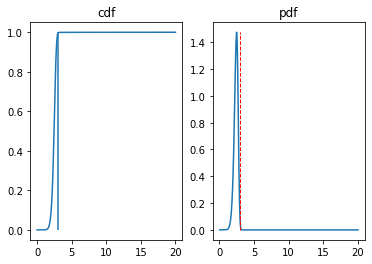

0.60417765


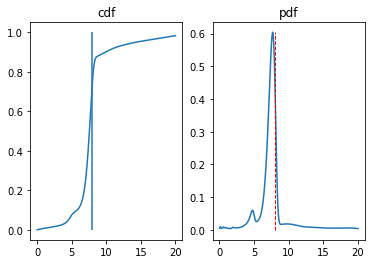

0.2728915


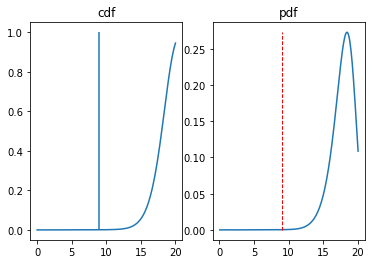

0.22465242


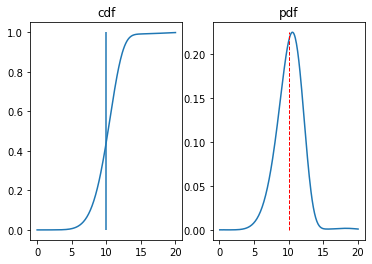

0.98318785


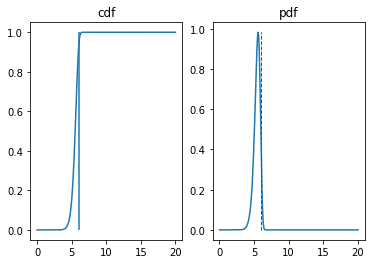

0.2730741


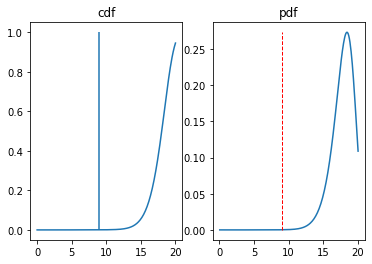

0.98241067


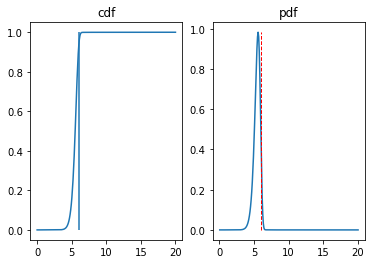

0.0008644464


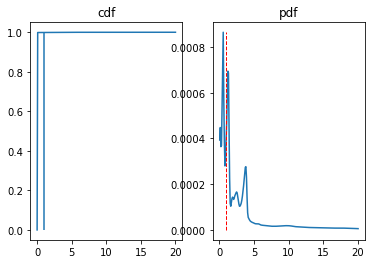

0.61292076


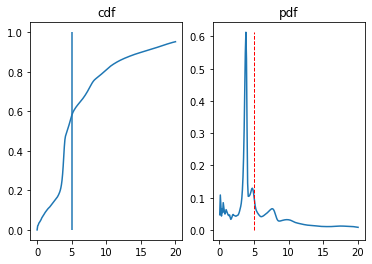

0.001820817


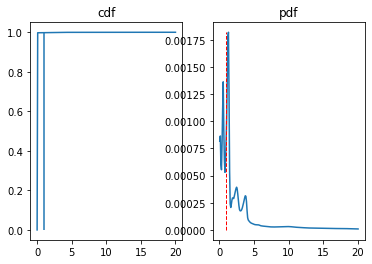

0.22399682


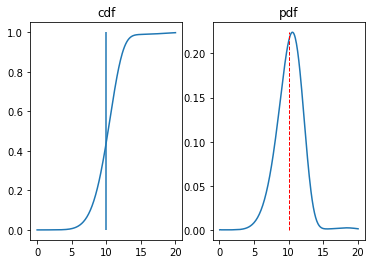

2.4957705


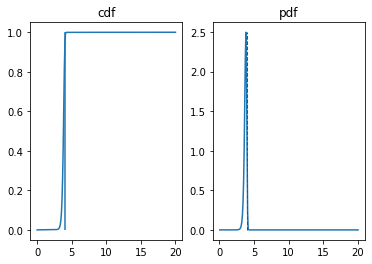

0.0024346977


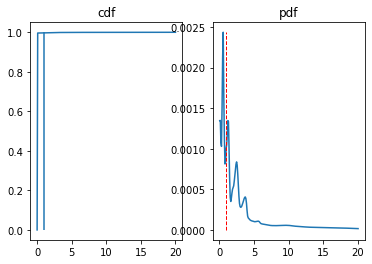

0.22368722


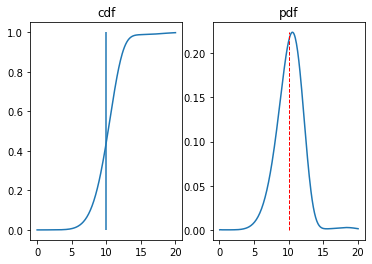

0.27257553


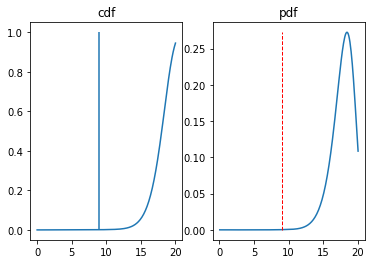

0.58874655


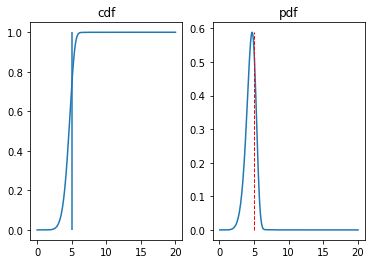

0.0008058614


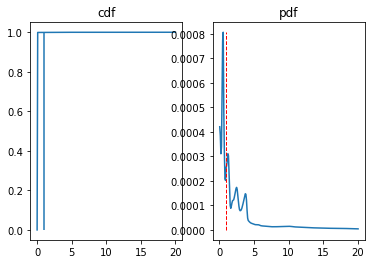

1.4741795


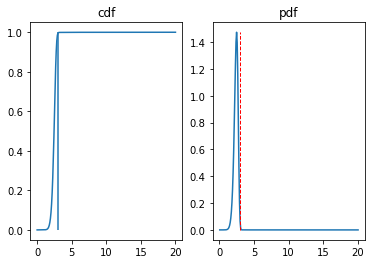

0.4193979


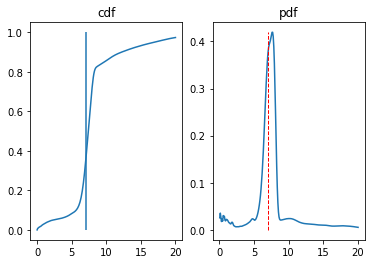

0.9828432


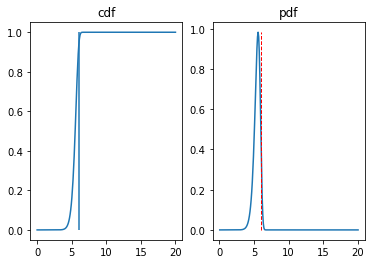

In [5]:
for i in range(20):
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, 20, 240), data['cdf'][i])
    plt.vlines(10-data['gt'][i],0,1)
    plt.title('cdf')
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, 20, 240),data['pdf'][i])
    maxval = np.max(data['pdf'][i].numpy()[1:])
    print(maxval)
    plt.vlines(10-data['gt'][i],0,maxval, color='r', linestyle='--', linewidth=1)
    plt.title('pdf')
    plt.show()